### M1M3 Bump test
* performed on 11/12/20, repeated ? times.
* we examine force accuracy and repeatability

In [1]:
#from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import matplotlib.dates as matdates
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from M1M3tools import * 

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

<Figure size 432x288 with 0 Axes>

In [2]:
client = EfdClient('summit_efd')
csc_index = 1

In [4]:
start = Time('2020-11-17T15:39:00') #this is UTC
end = start+timedelta(minutes=7)
#end = Time(datetime.now())
#end = Time('2020-11-12T16:48:00') #this is UTC
#start = end - timedelta(minutes=15)

In [5]:
df = await client.select_time_series('lsst.sal.MTM1M3.forceActuatorData', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

In [6]:
df

,forceMagnitude,fx,fy,fz,mx,my,mz,primaryCylinderForce0,primaryCylinderForce1,primaryCylinderForce10,...,zForce90,zForce91,zForce92,zForce93,zForce94,zForce95,zForce96,zForce97,zForce98,zForce99
2020-11-17 15:36:00.014000+00:00,45.012421,0.131193,0.210020,-45.011742,-30.673380,55.616871,0.770150,-0.130186,0.031046,0.157667,...,0.056113,-0.129067,-0.007816,0.079405,-0.630968,-0.088390,0.096980,0.097772,-0.309456,-0.048957
2020-11-17 15:36:00.034000+00:00,47.721527,0.089967,-0.441027,-47.719406,-30.999973,55.553028,0.428863,-0.325464,-0.093138,0.094600,...,-0.023243,-0.241152,0.023349,0.135472,-0.598662,-0.065576,-0.064654,-0.069485,-0.489290,0.039339
2020-11-17 15:36:00.054000+00:00,46.048809,0.159996,0.166175,-46.048229,-32.135715,53.509605,-0.342637,-0.325464,-0.031046,0.157667,...,-0.084996,0.006040,-0.054615,0.093355,-0.598662,-0.098363,-0.064654,0.046323,-0.430233,-0.003206
2020-11-17 15:36:00.074000+00:00,46.845997,-0.156136,-0.052494,-46.845707,-29.400961,56.394524,-1.213477,-0.358011,0.031046,0.126133,...,-0.145097,-0.050003,-0.093397,-0.004829,-0.686497,-0.078418,0.032327,-0.078914,-0.472553,0.209303
2020-11-17 15:36:00.094000+00:00,47.412956,-0.000549,1.050737,-47.401310,-30.764824,56.869858,0.203146,-0.390557,0.031046,0.126133,...,-0.009628,-0.205111,-0.101314,-0.042117,-0.510826,-0.019946,0.096980,0.134667,-0.459334,0.143882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-17 15:45:59.917000+00:00,25.299072,0.115566,-0.171562,-25.298227,-30.241529,32.216656,-2.758753,-0.227825,0.062092,-0.126133,...,0.088984,-0.083025,-0.007816,0.144861,-0.101973,-0.055603,0.193961,-0.074610,-0.045838,0.032710
2020-11-17 15:45:59.937000+00:00,24.018829,0.411451,-0.630035,-24.007040,-20.196854,32.174076,-0.439756,-0.162732,0.124183,-0.063067,...,-0.019255,-0.251153,-0.015633,0.051506,-0.046445,0.098363,0.226288,-0.120934,0.009700,-0.022876
2020-11-17 15:45:59.957000+00:00,26.457535,0.795969,0.222851,-26.444620,-17.120195,26.740948,-2.339116,-0.195278,0.155229,-0.031533,...,0.023243,-0.218131,-0.054615,0.243045,-0.106004,-0.108336,0.064654,-0.055752,-0.055538,-0.013041
2020-11-17 15:45:59.977000+00:00,27.873121,1.113802,0.422205,-27.847658,-16.557178,34.179089,-0.932204,-0.260371,0.124183,-0.094600,...,0.177967,-0.083025,0.023349,0.056067,-0.111058,-0.088390,0.064654,-0.111505,0.022919,-0.022876


In [7]:
F = assembleFinst(df)

In [8]:
F.shape

(30000, 156, 4)

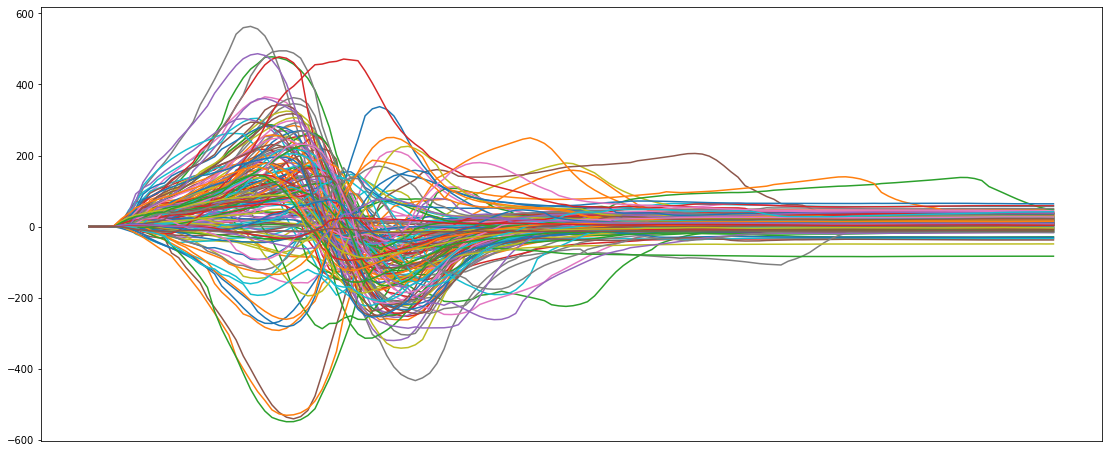

In [42]:
fig, ax = plt.subplots(figsize=(19,8))
for i in range(156):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), F[:,i,3] - F[0,i,3])

In [9]:
fa = np.array(FATABLE)
fcolIdx = {'id':0, 'x':1, 'y':2, 'z':3}

122 78 408 z 3
121 -1 407 z 3
123 79 409 z 3
7 4 108 y 2
72 49 238 z 3
133 87 420 z 3
139 92 427 z 3
127 82 414 z 3


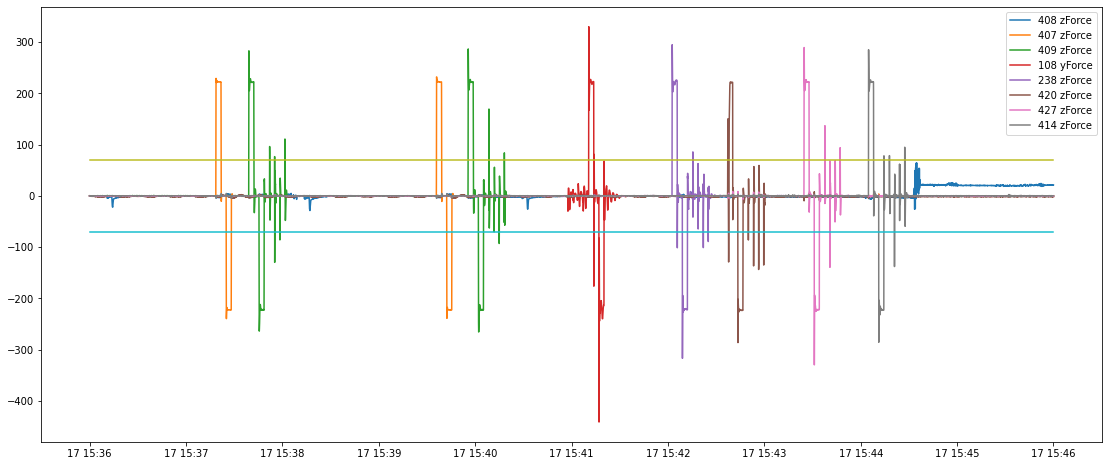

In [25]:
# 108 Y, 238 Z, 420 Z and possibly 427 Z
#seclocator = matdates.SecondLocator()
fig, ax = plt.subplots(figsize=(19,8))
checkList = {408:'z', 407:'z', 409:'z', 108:'y', 238:'z',  420:'z', 427:'z', 414:'z'}
for id in checkList:
    i = np.argmax(fa[:,FATABLE_ID] == str(id))
    ixyz = fcolIdx[checkList[id]]
    iy = int(fa[i, FATABLE_YINDEX])
    print(i,iy, id, checkList[id], ixyz)
    plt.plot(df.index.to_pydatetime(), F[:,i,ixyz] - F[0,i,ixyz], label = '%d %sForce'%(id,checkList[id]))

    continue
    if checkList[id] == 'y':
        plt.plot(df['secondaryCylinderForce%d'%iy],'-', label = '%d %s'%(id,'secondary cylinder'))
    elif checkList[id] == 'z':
        plt.plot(df['primaryCylinderForce%d'%i],'-', label = '%d %s'%(id,'primary cylinder'))
    #ax.xaxis.set_major_locator(seclocator)
    #plt.plot(range(5014), F[:,i,ixyz] - F[0,i,ixyz], label = '%d %s'%(id,checkList[id]))
plt.plot([df.index.to_pydatetime()[0],df.index.to_pydatetime()[-1]],[70,70])
plt.plot([df.index.to_pydatetime()[0],df.index.to_pydatetime()[-1]],[-70,-70])

    #plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['yForce%d'%i]-df['yForce%d'%i][0], label='108 yForce')

#i = 5
#plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['primaryCylinderForce%d'%i]-df['primaryCylinderForce%d'%i][0], label='106')
#i = 6
#plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['primaryCylinderForce%d'%i]-df['primaryCylinderForce%d'%i][0], label='107')
#plt.ylim([-20,20])
plt.legend();

In [22]:
df.index.to_pydatetime()[0,1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [46]:
pd.to_datetime(df.private_sndStamp, unit='s')

2020-11-13 17:13:27.293000+00:00   2020-11-13 17:13:27.293612719
2020-11-13 17:13:27.324000+00:00   2020-11-13 17:13:27.324777126
2020-11-13 17:13:27.342000+00:00   2020-11-13 17:13:27.342643499
2020-11-13 17:13:27.362000+00:00   2020-11-13 17:13:27.362061501
2020-11-13 17:13:27.382000+00:00   2020-11-13 17:13:27.382102728
                                                ...             
2020-11-13 17:13:29.902000+00:00   2020-11-13 17:13:29.902155399
2020-11-13 17:13:29.922000+00:00   2020-11-13 17:13:29.922397614
2020-11-13 17:13:29.942000+00:00   2020-11-13 17:13:29.942215204
2020-11-13 17:13:29.962000+00:00   2020-11-13 17:13:29.962271452
2020-11-13 17:13:29.982000+00:00   2020-11-13 17:13:29.982135057
Name: private_sndStamp, Length: 135, dtype: datetime64[ns]

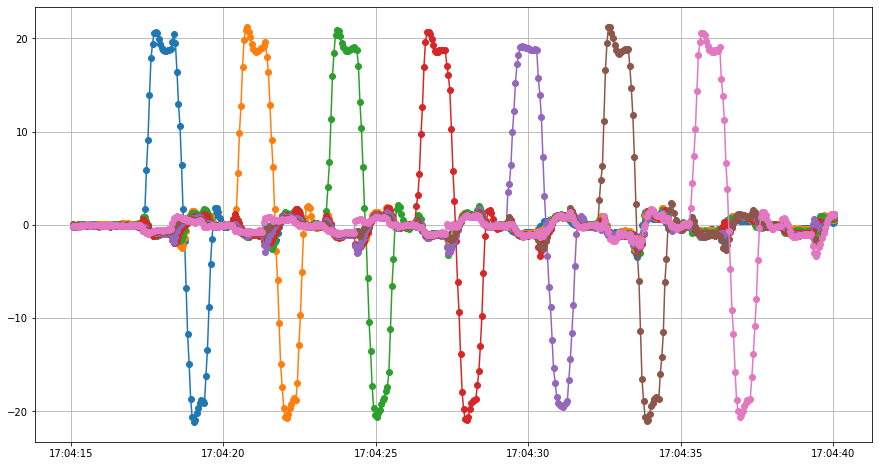

In [20]:
startIdx = np.argmax(df['axialForceMeasured0'] -df['axialForceMeasured0'][0]>10) - 50
fig, ax = plt.subplots(figsize=(15,8))
for i in range(7):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+500], unit='s'), 
             df['axialForceMeasured%d'%i][startIdx:startIdx+500]-df['axialForceMeasured%d'%i][0],'-o')
plt.grid()

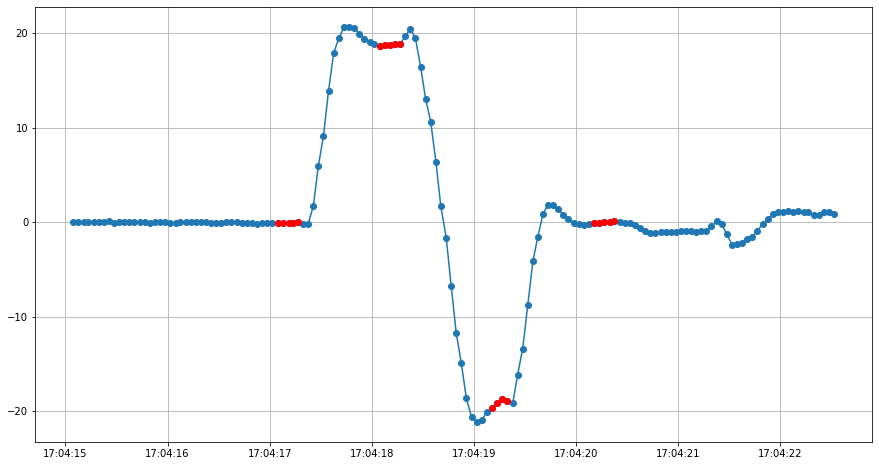

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(1):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+150], unit='s'), 
             df['axialForceMeasured%d'%i][startIdx:startIdx+150]-df['axialForceMeasured%d'%i][0],'-o')
plt.grid()
aa = np.array(df['axialForceMeasured%d'%i][startIdx:startIdx+150]-df['axialForceMeasured%d'%i][0])
i1 = np.argmax(aa>10)
idx0 = np.arange(i1-10,i1-5)
idx1 = np.arange(i1+10,i1+15)
idx2 = np.arange(i1+32, i1+36)
idx3 = np.arange(i1+52, i1+57)
plt.plot(pd.to_datetime(df.private_sndStamp[idx0+startIdx], unit='s'), aa[idx0],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx1+startIdx], unit='s'), aa[idx1],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx2+startIdx], unit='s'), aa[idx2],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx3+startIdx], unit='s'), aa[idx3],'ro')

In [23]:
df = await client.select_time_series('lsst.sal.MTM2.tangentForcesMeasured', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

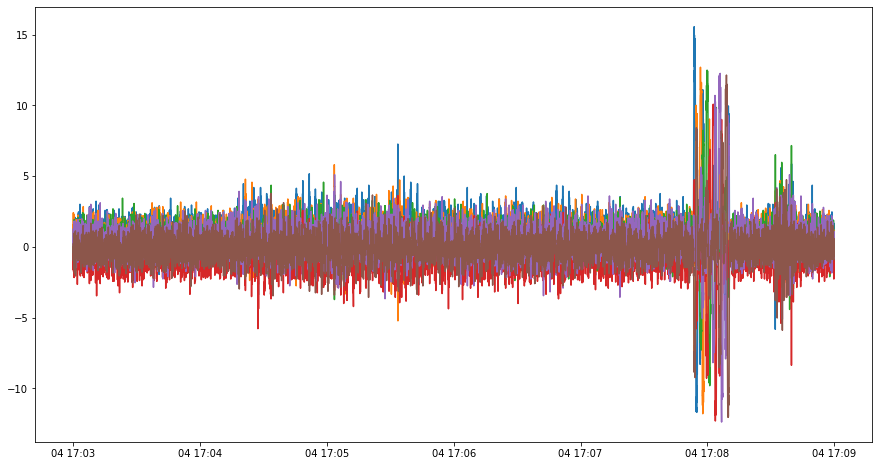

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), 
             df['tangentLink%dDegForceMeasured'%(i*60)]-df['tangentLink%dDegForceMeasured'%(i*60)][0])

In [25]:
i = 0
startIdx = np.argmax(df['tangentLink%dDegForceMeasured'%(i*60)]-df['tangentLink%dDegForceMeasured'%(i*60)][0]>10) - 50

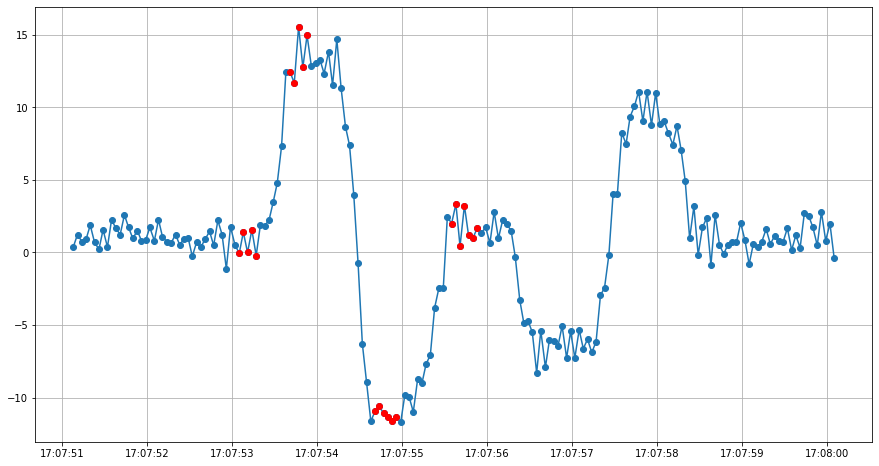

In [30]:
rr = 180
fig, ax = plt.subplots(figsize=(15,8))
for i in np.arange(1):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+rr], unit='s'), 
             df['tangentLink%dDegForceMeasured'%(i*60)][startIdx:startIdx+rr]-df['tangentLink%dDegForceMeasured'%(i*60)][0],'-o')
plt.grid()
aa = np.array(df['tangentLink%dDegForceMeasured'%(i*60)][startIdx:startIdx+rr]-df['tangentLink%dDegForceMeasured'%(i*60)][0])
i1 = np.argmax(aa>0.95*max(aa))-4
idx0 = np.arange(i1-10,i1-5)
idx1 = np.arange(i1+2,i1+7)
idx2 = np.arange(i1+22, i1+28)
idx3 = np.arange(i1+40, i1+47)
plt.plot(pd.to_datetime(df.private_sndStamp[idx0+startIdx], unit='s'), aa[idx0],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx1+startIdx], unit='s'), aa[idx1],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx2+startIdx], unit='s'), aa[idx2],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx3+startIdx], unit='s'), aa[idx3],'ro');

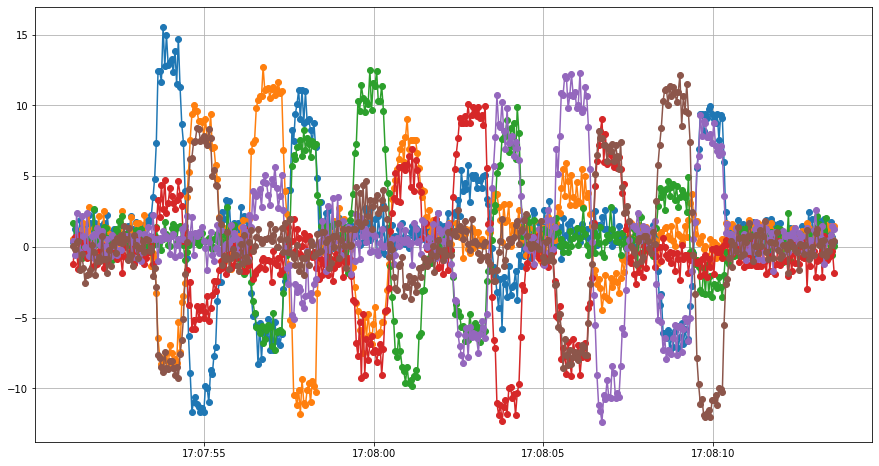

In [35]:
rr = 450
fig, ax = plt.subplots(figsize=(15,8))
for i in np.arange(6):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+rr], unit='s'), 
             df['tangentLink%dDegForceMeasured'%(i*60)][startIdx:startIdx+rr]-df['tangentLink%dDegForceMeasured'%(i*60)][0],'-o')
plt.grid()
aa = np.array(df['tangentLink%dDegForceMeasured'%(i*60)][startIdx:startIdx+rr]-df['tangentLink%dDegForceMeasured'%(i*60)][0])